# HomeWork 3

**DeadLine : 12:00 PM 21 Mehr 1399**

**Total points : 120pts**

Import some prerequisites

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import time

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 4

Here is for your helper functions(optional)

In [3]:
def compute_cdf(img):
    L = 256
    n = img.shape[0] * img.shape[1]
    
    hist = compute_histogram(img)
    cdf = np.array(hist, dtype=np.float64)
    
    for i in range(1,len(cdf)):
        cdf[i] += cdf[i-1]
        
    cdf /= (n)
#     cdf *= (L-1)
    
#     cdf = cdf.round()
    return cdf

In this cell you should calculate histogram. Don't use opencv methods here. You can use your implementations from HW2.

In [4]:
def compute_histogram(image):
    '''
    Computes histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The numpy array of numbers in histogram.   
    '''
    
    histogram = np.zeros((256), np.int)
    
    ####### your code ########
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i][j]] += 1
    
    ##########################
    
    return histogram

Implement histogram matching. Don't use modules like opencv and scikit-image.

In [5]:
def histogram_matching(img, ref_img):
    '''
    Matchs the histogram of the input image to the histogram of reference image.
    
    Parameters:
        img (numpy.ndarray): The input image.
        ref_img (numpy.ndarray): The reference image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = img.copy()
    L = 256
    n = img.shape[0] * img.shape[1]
    
    ####### your code ########
    cdf_ref = compute_cdf(ref_img)
    cdf_img = compute_cdf(img)
    
    new_pixels = np.interp(cdf_img, cdf_ref, np.arange(256)) 
    out_img = (np.reshape(new_pixels[out_img.ravel()], out_img.shape)).astype(np.uint8)
    
#     for i in range(len(out_img)):
#         for j in range(len(out_img[i])):
#             for k in range(len(cdf_ref)):
#                 if cdf_img[out_img[i][j]] <= cdf_ref[k]:
#                     out_img[i][j] = k
#                     break
    ##########################
    
    return out_img

Test your implementation (dont change this cell)

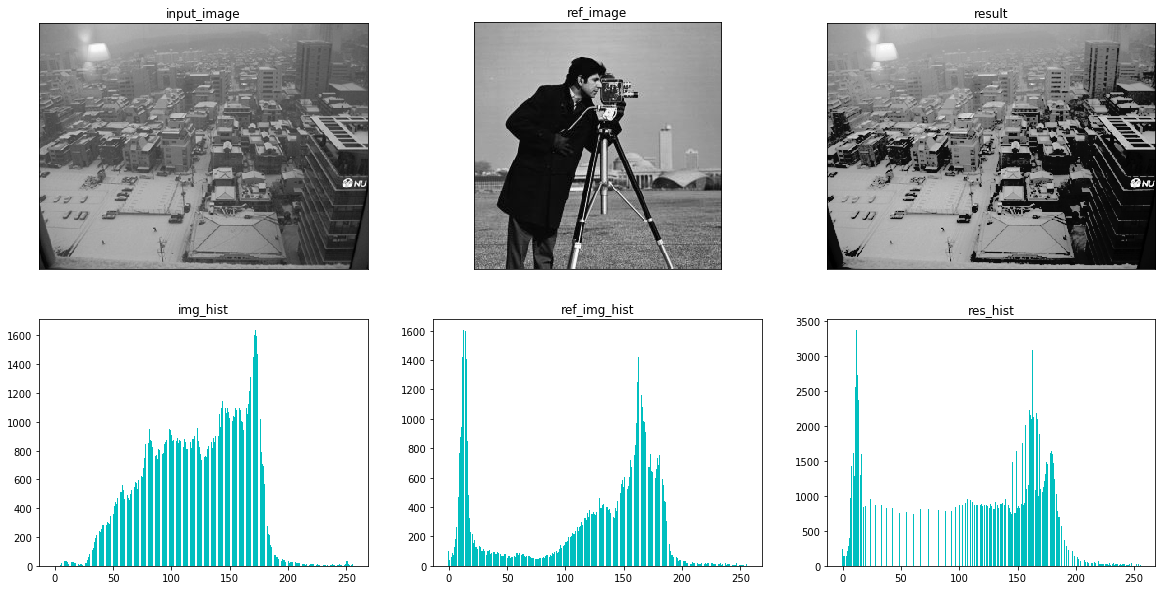

In [6]:
img = cv2.imread(os.path.join('images', 'Q4.jpg'), cv2.IMREAD_GRAYSCALE)
ref_img = cv2.imread(os.path.join('images', 'Q4_ref.jpg'), cv2.IMREAD_GRAYSCALE)
output = histogram_matching(img,ref_img)
h_img = compute_histogram(img)
h_ref_img = compute_histogram(ref_img)
h_out = compute_histogram(output)
image_list = []
image_list.append([img, 'input_image', 'img'])
image_list.append([ref_img, 'ref_image', 'img'])
image_list.append([output, 'result', 'img'])
image_list.append([h_img, 'img_hist', 'hist'])
image_list.append([h_ref_img, 'ref_img_hist', 'hist'])
image_list.append([h_out, 'res_hist', 'hist'])
plotter(image_list, 2, 3, True, 20, 10, 'q4')

# PART 5

Here is for your helper functions(optional)

In [7]:
import scipy.stats as st

For making gaussian kernel don't use modules like opencv. You should implement this kernel by yourself.

In [24]:
def gaussian_filter(size, std):
    '''
    Creates the Guassian kernel with given size and std.
    
    Parameters:
        size (int): The size of the kernel. It must be odd.
        std (float): The standard deviation of the kernel.
    
    Returns:
        numpy.ndarray: The Guassina kernel.
    '''
    
    kernel = np.zeros((size,size), np.float)
    pi = np.pi
    e = np.exp(1)
    ####### your code ########
    
    r = size//2
    
    for i in range(size):
        for j in range(size):
            kernel[i][j] = (1/(2*pi*(std**2))) * e**-(((i-r)**2 + (j-r)**2)/(2*(std**2)))
    kernel = np.array([1,2,1],dtype=float)
    ##########################
    
    return kernel

Use the OpenCV Gaussian Blur function to filter image.

In [9]:
def opencv_filter(img):
    '''
    Applys the OpenCV's guassian blur function on input image.
    
    Parameters:
        img (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out = None
    ####### your code ########
    
    out = cv2.GaussianBlur(img,(5,5),0)
    
    ##########################
    
    return out

Test your implementation (dont change this cell)

time for applying your guassian filter: 0.000977 s
time for applying OpenCV guassian filter: 0.000228 s


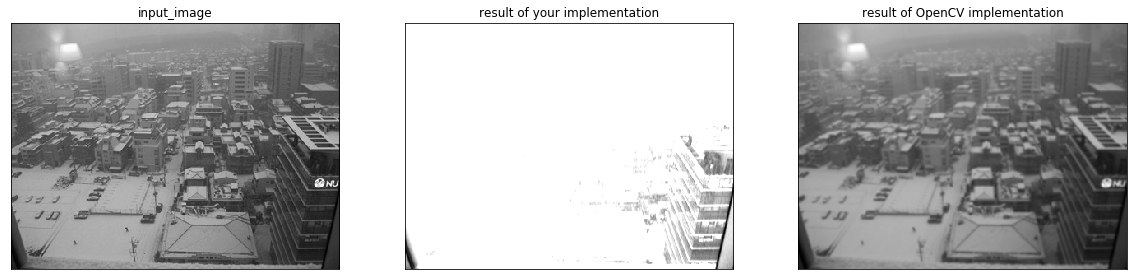

In [25]:
img = cv2.imread(os.path.join('images', 'Q4.jpg'), cv2.IMREAD_GRAYSCALE)
size = 3
std = 1
t1 = time.time()
kernel = gaussian_filter(size, std)
out_y_imp = cv2.filter2D(img, -1, kernel)/4
t2 = time.time()
out_ocv_imp = opencv_filter(img)
t3 = time.time()
print('time for applying your guassian filter: %f s' % (t2 - t1))
print('time for applying OpenCV guassian filter: %f s' % (t3 - t2))
image_list = []
image_list.append([img, 'input_image', 'img'])
image_list.append([out_y_imp, 'result of your implementation', 'img'])
image_list.append([out_ocv_imp, 'result of OpenCV implementation', 'img'])
plotter(image_list, 1, 3, True, 20, 10, 'q5')

For create proper files for sending in quera run this cell.

In [11]:
!python notebook_converter.py

End. Have a good time!!